In [3]:
# Import necessary PySpark functions
from pyspark.sql import SparkSession
import pyspark.sql.functions as F


In [4]:
# Initialize SparkSession
spark = SparkSession.builder.appName("Tomatometer").getOrCreate()

In [5]:
df = spark.read.csv('./data/rotten_tomatoes_movies.csv', header=True, inferSchema=True)
df

DataFrame[id: string, title: string, audienceScore: int, tomatoMeter: int, rating: string, ratingContents: string, releaseDateTheaters: date, releaseDateStreaming: string, runtimeMinutes: int, genre: string, originalLanguage: string, director: string, writer: string, boxOffice: string, distributor: string, soundMix: string]

In [6]:
df.show()

+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+----------------+--------------------+--------------------+---------+-----------------+--------+
|                  id|               title|audienceScore|tomatoMeter|rating|      ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|               genre|originalLanguage|            director|              writer|boxOffice|      distributor|soundMix|
+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+----------------+--------------------+--------------------+---------+-----------------+--------+
|  space-zombie-bingo| Space Zombie Bingo!|           50|       NULL|  NULL|                NULL|               NULL|          2018-08-25|            75|Comedy, Horror, S...|         Engl

In [7]:
df.printSchema()
print("number of rows:", df.count())

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- audienceScore: integer (nullable = true)
 |-- tomatoMeter: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- ratingContents: string (nullable = true)
 |-- releaseDateTheaters: date (nullable = true)
 |-- releaseDateStreaming: string (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genre: string (nullable = true)
 |-- originalLanguage: string (nullable = true)
 |-- director: string (nullable = true)
 |-- writer: string (nullable = true)
 |-- boxOffice: string (nullable = true)
 |-- distributor: string (nullable = true)
 |-- soundMix: string (nullable = true)

number of rows: 143258


**Cleaning: Missing values**

Check for missing values in the audienceScore, tomatoMeter, and releaseDateTheaters columns. Handle them by removing rows with a null value in either of these columns.

In [29]:
df.filter(F.col('audienceScore').isNull()).count()

70010

In [9]:
df.filter(F.col('tomatoMeter').isNull()).count()

109381

In [10]:
df.filter(F.col('releaseDateTheaters').isNull()).count()

112485

In [6]:
# creating a function

def show_missing(df):
    # show count of missing values
    missing_values = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns])
    print('Toal rows', df.count())
    missing_values.show(vertical=True)
show_missing(df)

Toal rows 143258
-RECORD 0----------------------
 id                   | 0      
 title                | 367    
 audienceScore        | 70010  
 tomatoMeter          | 109381 
 rating               | 129267 
 ratingContents       | 129267 
 releaseDateTheaters  | 112485 
 releaseDateStreaming | 63838  
 runtimeMinutes       | 13827  
 genre                | 11083  
 originalLanguage     | 13858  
 director             | 4194   
 writer               | 53142  
 boxOffice            | 128491 
 distributor          | 120248 
 soundMix             | 127333 



Dropping...

In [7]:
dropped_rows = df.na.drop(subset = ['audienceScore','tomatoMeter','releaseDateTheaters']).count()
dropped_rows

18807

In [9]:
df = df.na.drop(subset = ['audienceScore','tomatoMeter','releaseDateTheaters'])
show_missing(df)

Toal rows 18807
-RECORD 0---------------------
 id                   | 0     
 title                | 0     
 audienceScore        | 0     
 tomatoMeter          | 0     
 rating               | 10975 
 ratingContents       | 10975 
 releaseDateTheaters  | 0     
 releaseDateStreaming | 1071  
 runtimeMinutes       | 28    
 genre                | 2     
 originalLanguage     | 129   
 director             | 28    
 writer               | 2567  
 boxOffice            | 7797  
 distributor          | 2158  
 soundMix             | 11187 



Good practice to check % dropped

In [55]:
num_rows = df.count()
num_rows

143258

In [56]:
percent_dropped = 1 - (dropped_rows/num_rows)
percent_dropped

0.8687193734381327

In [10]:
df.show()

+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+
|                  id|               title|audienceScore|tomatoMeter|rating|      ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|               genre|    originalLanguage|            director|              writer|boxOffice|         distributor|            soundMix|
+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+
|         adrift_2018|              Adrift|           65|         69| PG-13|['Injury Images',...|         2018-06-01|          201

**Processing**

a) Year: Create a year column by parsing the year from the releaseDateTheaters column.

b) 
Top Movies: Find the top 500 movies based on Tomatometer score using functions like orderBy and limit.

**Import functions to use date and time resources**

In [12]:
df = df.withColumn('year', F.year('releaseDateTheaters'))
df.select('year').show()

+----+
|year|
+----+
|2018|
|1947|
|2009|
|2011|
|2005|
|2017|
|1963|
|1996|
|2009|
|1991|
|2002|
|2017|
|2022|
|2015|
|1993|
|2012|
|2019|
|2017|
|2014|
|2004|
+----+
only showing top 20 rows



In [13]:
df.show()

+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+
|                  id|               title|audienceScore|tomatoMeter|rating|      ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|               genre|    originalLanguage|            director|              writer|boxOffice|         distributor|            soundMix|year|
+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+
|         adrift_2018|              Adrift|           65|         69| PG-13|['Injury Images',...|         2018-06-0

**Check it pulled the years**

In [16]:
df.select('releaseDateTheaters').show()

+-------------------+
|releaseDateTheaters|
+-------------------+
|         2018-06-01|
|         1947-04-30|
|         2009-12-04|
|         2011-09-30|
|         2005-08-10|
|         2017-09-08|
|         1963-10-02|
|         1996-03-22|
|         2009-01-16|
|         1991-01-11|
|         2002-02-22|
|         2017-05-12|
|         2022-06-03|
|         2015-05-01|
|         1993-07-07|
|         2012-03-09|
|         2019-04-10|
|         2017-07-14|
|         2014-12-05|
|         2004-06-18|
+-------------------+
only showing top 20 rows



Find the top 5000 movies based on Tomatometer score using functions like orderBy and limit.


In [19]:
movies_sorted = df.orderBy(F.col("tomatoMeter").desc()).limit(5000)
show_missing(movies_sorted)

Toal rows 5000
-RECORD 0--------------------
 id                   | 0    
 title                | 0    
 audienceScore        | 0    
 tomatoMeter          | 0    
 rating               | 3734 
 ratingContents       | 3734 
 releaseDateTheaters  | 0    
 releaseDateStreaming | 365  
 runtimeMinutes       | 6    
 genre                | 0    
 originalLanguage     | 89   
 director             | 4    
 writer               | 965  
 boxOffice            | 2461 
 distributor          | 602  
 soundMix             | 3261 
 year                 | 0    



In [20]:
movies_sorted.select('title', 'tomatoMeter', 'audienceScore', 'year', 'originalLanguage').show()


+--------------------+-----------+-------------+----+--------------------+
|               title|tomatoMeter|audienceScore|year|    originalLanguage|
+--------------------+-----------+-------------+----+--------------------+
|     The Human Trial|        100|           99|2022|             English|
|             McLibel|        100|           69|2005|English (United K...|
|   The Monkey King 2|        100|           52|2016|             Chinese|
|       Roll Red Roll|        100|           75|2019|             English|
| Singin' in the Rain|        100|           95|1952|             English|
|   Skid Row Marathon|        100|          100|2019|             English|
|     The Blue Dahlia|        100|           71|1946|             English|
|Letter From Masanjia|        100|           89|2018|             English|
|        Ballet Shoes|        100|           66|2008|             English|
|    A Foreign Affair|        100|           78|1948|             English|
|This Much I Know ...|   

In [21]:
movies_sorted.select(F.min('tomatoMeter')).show()

+----------------+
|min(tomatoMeter)|
+----------------+
|              86|
+----------------+



**Save as Parquet**

In [24]:
movies_sorted.write.parquet('./data/moves_sorted.parquet', mode='overwrite')

**Pandas Data Analysis**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Create pandas df

# use .toPandas()

pandas_df = movies_sorted.toPandas()
pandas_df

Scatter plot: Exploring the relationship between audience score and Tomatometer score.


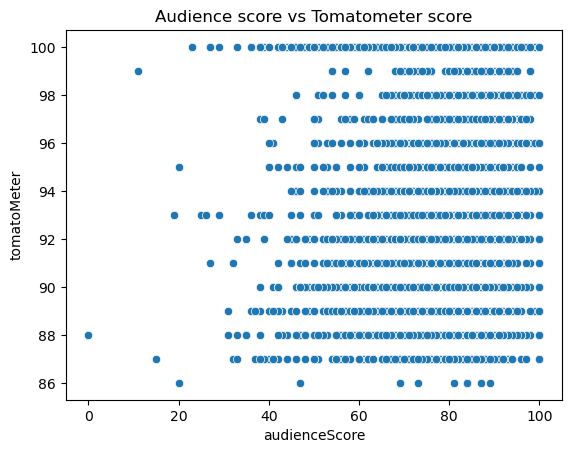

In [26]:
sns.scatterplot(x = 'audienceScore', y = 'tomatoMeter', data = pandas_df)
plt.title('Audience score vs Tomatometer score')
plt.xlabel("Audience Score")
plt.ylabel("Tomatometer Score")
plt.show()

Line Chart: Analyzing trends in average Tomatometer score and audience score over time (years).

In [32]:
from pyspark.sql.functions import avg

In [34]:
avg_tomato =  df.agg(avg('tomatoMeter')).first()[0]
avg_audience =  df.agg(avg('audienceScore')).first()[0]

In [37]:
print(avg_tomato)

63.535332588929656


In [49]:
avg_scores_by_year = pandas_df.groupby("year").agg({
    "audienceScore": "mean",
    "tomatoMeter": "mean"
}).reset_index()

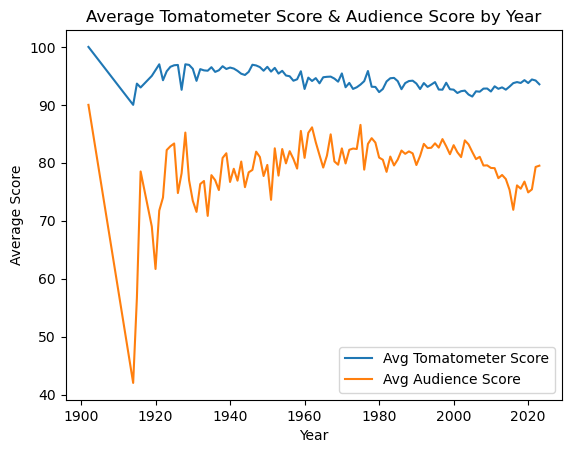

In [51]:
sns.lineplot(x='year', y='tomatoMeter', data=avg_scores_by_year, label='Avg Tomatometer Score')
sns.lineplot(x='year', y='audienceScore', data=avg_scores_by_year, label='Avg Audience Score')
plt.title('Average Tomatometer Score & Audience Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

Bar Chart: Compare average audience score to the average Tomatometer score, grouped by original language.

In [40]:
avg_audience = pandas_df.groupby('originalLanguage')['audienceScore'].mean().reset_index()
avg_audience

,originalLanguage,audienceScore
0,Afrikaans,69.666667
1,Albanian,81.000000
2,Arabic,81.021277
3,Armenian,73.000000
4,Bambara,84.000000
...,...,...
73,Urdu,78.000000
74,Vietnamese,72.600000
75,Wolof,67.333333
76,Yiddish,64.500000


In [47]:
avg_tom = pandas_df.groupby('originalLanguage')['tomatoMeter'].mean().reset_index()
avg_tom

,originalLanguage,tomatoMeter
0,Afrikaans,93.000000
1,Albanian,100.000000
2,Arabic,93.893617
3,Armenian,93.000000
4,Bambara,99.000000
...,...,...
73,Urdu,95.750000
74,Vietnamese,96.200000
75,Wolof,91.666667
76,Yiddish,97.500000


In [52]:
languages_grouped = pandas_df.groupby("originalLanguage").agg({
    "audienceScore": "mean",
    "tomatoMeter": "mean"
}).reset_index()

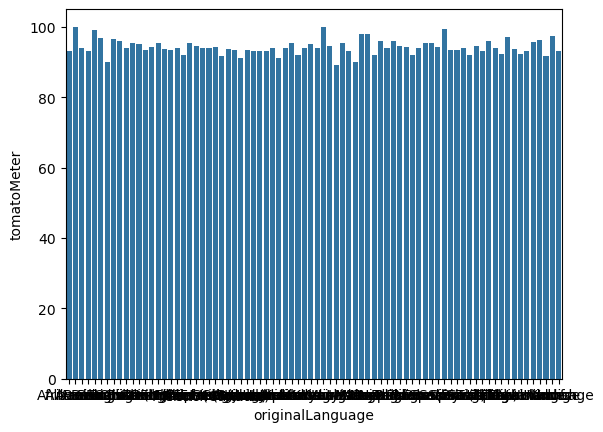

In [55]:
# Plotting with Seaborn (bar plot)
sns.barplot(x='originalLanguage', y='tomatoMeter', data=languages_grouped)
plt.show()